In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy.stats as sp


In [109]:
df = pd.read_csv('Wine.csv')
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [110]:
df.columns = ['Place_Origin', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13']
df.head()

,Place_Origin,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [111]:
x = df.loc[:, 'V1':]
y = df.V1

In [112]:
x.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
16,13.83,1.57,2.62,20.0,115,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130
140,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780
75,13.03,0.90,1.71,16.0,86,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392
149,13.50,3.12,2.62,24.0,123,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500
73,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
133,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650
44,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
147,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650


In [113]:
y.sample(10)

97     12.37
1      13.16
155    13.84
133    12.51
171    14.16
45     14.38
122    13.05
0      13.20
108    11.61
67     13.34
Name: V1, dtype: float64

The columns V2 to V14 indicate the different chemical concentrations in the wine sample. Column V1 indicates the place of production of the wine.

## Multivariate Plots 

#### Scatter Plot Matrix 

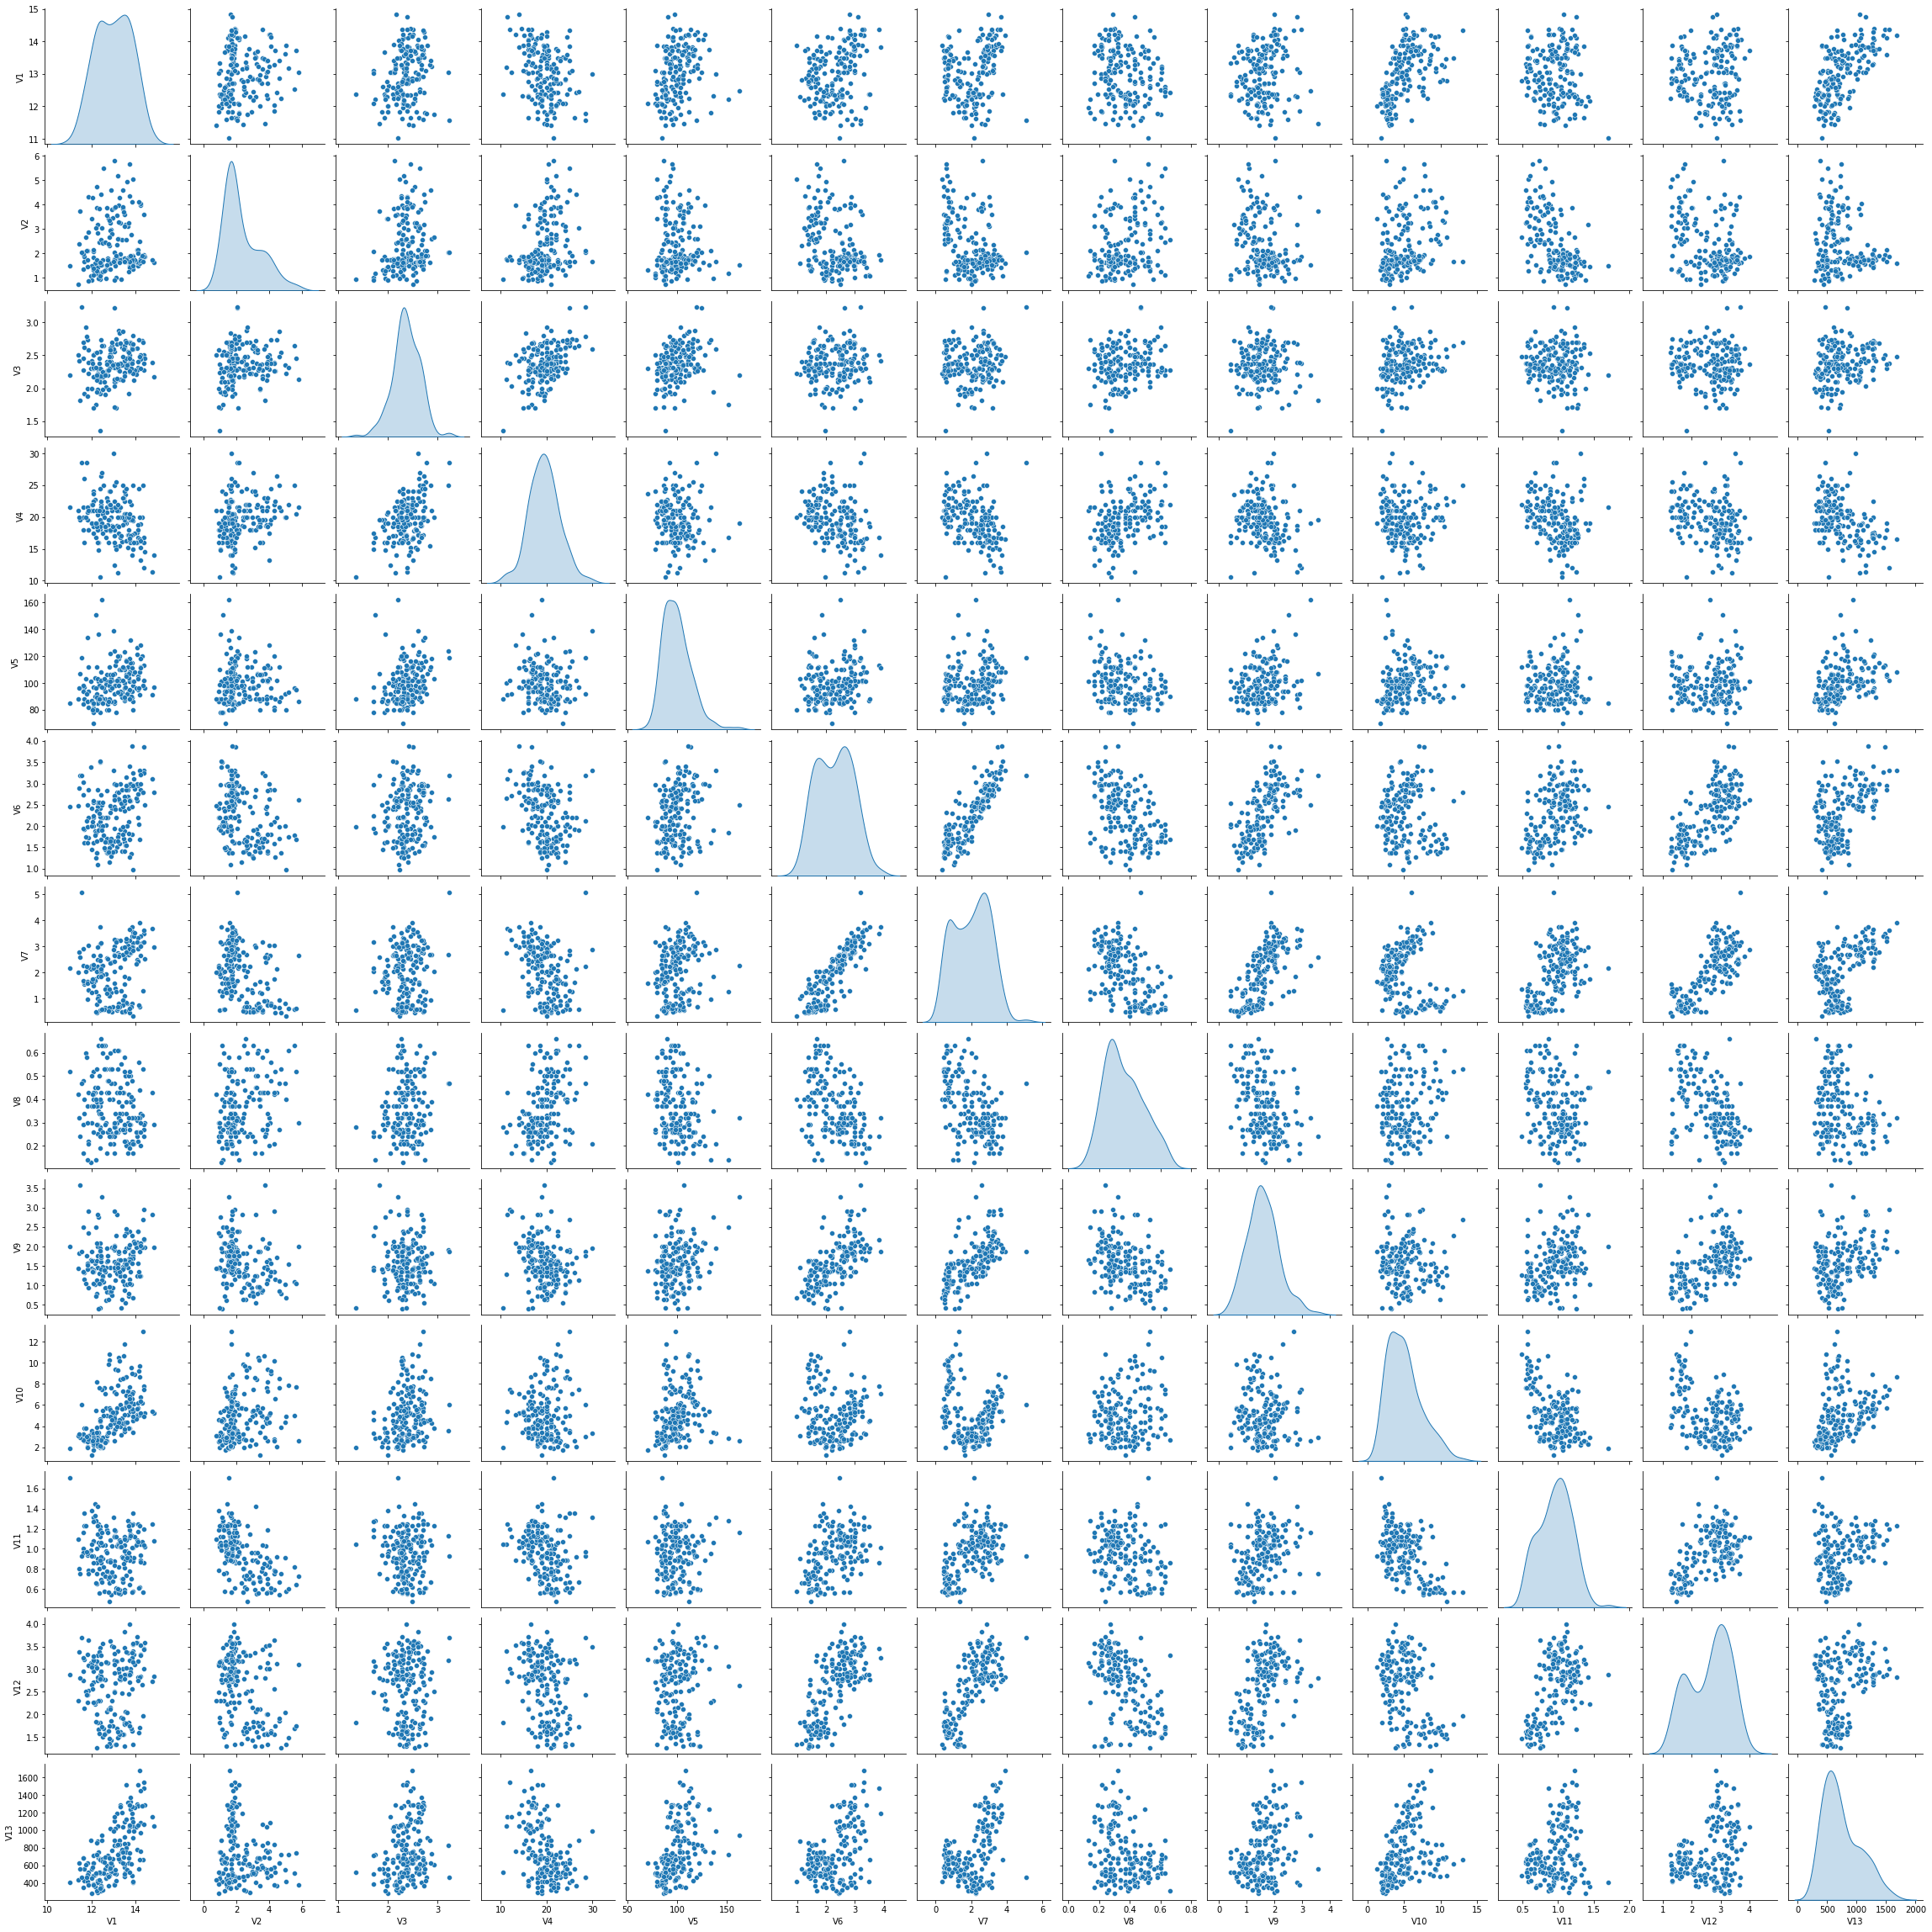

In [114]:
sns.pairplot(x, diag_kind = 'kde')

#### Scatter Plot

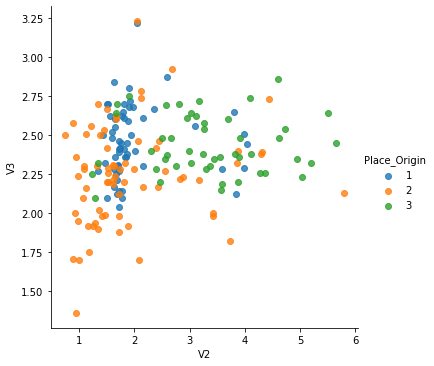

In [115]:
sns.lmplot(data = df, x = 'V2', y = 'V3', hue = 'Place_Origin', fit_reg = False)

<AxesSubplot:xlabel='V2', ylabel='V3'>

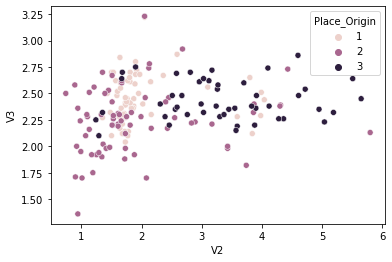

In [116]:
sns.scatterplot(data = df, x='V2', y='V3', hue= 'Place_Origin')

#### Heatmap showing correlation

Pearson coefficient - If we have two variables. <br>
For more than two variaables we can use the pandas function corr()

<AxesSubplot:>

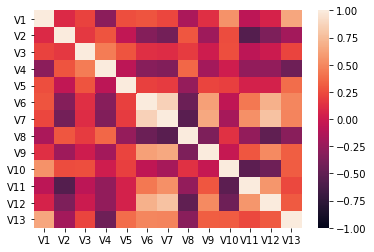

In [117]:
corr_mat = x.corr()
sns.heatmap(corr_mat, vmin = -1, vmax = 1)

#### Hinton diagram

In a hinton digram the larger the size of the box the higher is the magnitude of correlation. <br>
The  red color box indicates positive corrleation, and the blue color indicate negative correlation.


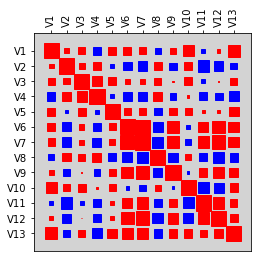

In [118]:
def hinton(matrix, max_weight=None, ax=None):
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'red' if w > 0 else 'blue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)

    ax.autoscale_view()
    ax.invert_yaxis()

hinton(corr_mat)

The source code to produce a hinton diagram is available in the matplotlib documentation.

#### Profile plots

Lineplots for multiple variables on the same graph. 

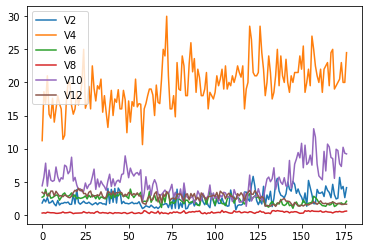

In [119]:
ax = df[['V2', 'V4', 'V6', 'V8', 'V10', 'V12']].plot()

#### Summary Statistics for multivariate datasets

In [120]:
x.apply(np.mean)

V1      12.993672
V2       2.339887
V3       2.366158
V4      19.516949
V5      99.587571
V6       2.292260
V7       2.023446
V8       0.362316
V9       1.586949
V10      5.054802
V11      0.956983
V12      2.604294
V13    745.096045
dtype: float64

In [121]:
x.std()

V1       0.808808
V2       1.119314
V3       0.275080
V4       3.336071
V5      14.174018
V6       0.626465
V7       0.998658
V8       0.124653
V9       0.571545
V10      2.324446
V11      0.229135
V12      0.705103
V13    314.884046
dtype: float64

#### Variance witin groups

In [122]:
df.groupby("Place_Origin")["V1"].count()

Place_Origin
1    58
2    71
3    48
Name: V1, dtype: int64

In [123]:
group1_mean = df['V1'][df['Place_Origin'] == 1].mean()
group2_mean = df['V1'][df['Place_Origin'] == 2].mean()
group3_mean = df['V1'][df['Place_Origin'] == 3].mean()
print(group1_mean, group2_mean, group3_mean)

13.736379310344828 12.278732394366195 13.153750000000002


In [124]:
g1sum = np.sum((df['V1'][df['Place_Origin'] == 1] - group1_mean)**2)
g2sum = np.sum((df['V1'][df['Place_Origin'] == 2] - group2_mean)**2)
g3sum = np.sum((df['V1'][df['Place_Origin'] == 3] - group3_mean)**2)
numerator = g1sum+g2sum+g3sum
denom = len(df) - 3
variance_wg = numerator/denom
print("variance within groups is:", variance_wg)


variance within groups is: 0.26218189983141016


#### Variance between groups

In [125]:
global_mean = df['V1'].mean()
global_mean

12.993672316384181

In [126]:
group1_len = len(df['V1'][df['Place_Origin'] == 1])
group2_len = len(df['V1'][df['Place_Origin'] == 2])
group3_len = len(df['V1'][df['Place_Origin'] == 3])
n1 = group1_len* ((global_mean - group1_mean)**2)
n2 = group2_len* ((global_mean - group2_mean)**2)
n3 = group3_len* ((global_mean - group3_mean)**2)
numerator = n1+n2+n3
variance_bg = numerator/2
print("variance between groups is:", variance_bg)

variance between groups is: 34.757231211842644


#### Co-variance of two variables within groups

In [133]:
def calcWithinGroupsCovariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    Covw = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        term1 = 0.0
        for levelidata1j, levelidata2j in zip(levelidata1, levelidata2):
            term1 += (levelidata1j - mean1)*(levelidata2j - mean2)
        Cov_groupi = term1 # covariance for this group
        Covw += Cov_groupi
    totallength = len(variable1)
    Covw /= totallength - numlevels
    return Covw
calcWithinGroupsCovariance(df.V7, df.V10, df.Place_Origin)

0.2882751886766613

#### Co-variance of two variables between groups

In [134]:
def calcBetweenGroupsCovariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    variable1mean = np.mean(variable1)
    variable2mean = np.mean(variable2)
    Covb = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * levelilength
        Covb += term1
    Covb /= numlevels - 1
    return Covb
calcBetweenGroupsCovariance(df.V7, df.V10, df.Place_Origin)

-60.70795534741188

#### Principle Component Analysis

In [139]:
import sklearn.preprocessing as skp
standardisedX = skp.scale(x)
standardisedX = pd.DataFrame(standardisedX, index=x.index, columns=x.columns)

In [140]:
standardisedX.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965


In [141]:
standardisedX.mean()

V1    -5.218675e-16
V2     2.810056e-16
V3    -3.813647e-16
V4    -2.408619e-16
V5    -8.028731e-17
V6    -2.810056e-16
V7     1.605746e-16
V8    -6.021549e-16
V9    -4.014366e-17
V10    1.806465e-16
V11    6.021549e-16
V12    7.225858e-16
V13    1.605746e-16
dtype: float64

In [142]:
standardisedX.std()

V1     1.002837
V2     1.002837
V3     1.002837
V4     1.002837
V5     1.002837
V6     1.002837
V7     1.002837
V8     1.002837
V9     1.002837
V10    1.002837
V11    1.002837
V12    1.002837
V13    1.002837
dtype: float64

In [148]:
from sklearn.decomposition import PCA
pca = PCA().fit(standardisedX)
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary
summary = pca_summary(pca, standardisedX)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.162822,0.359831,0.359831
PC2,1.581571,0.192413,0.552244
PC3,1.205541,0.111795,0.664038
PC4,0.961480,0.071111,0.735149
PC5,0.928298,0.066287,0.801437
PC6,0.803024,0.049604,0.851040
PC7,0.742955,0.042460,0.893500
PC8,0.592232,0.026980,0.920480
PC9,0.537755,0.022245,0.942725


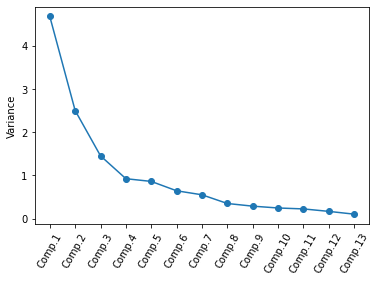

In [149]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standardisedX)